<a href="https://colab.research.google.com/github/SvA1/Compling/blob/master/HW5_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!apt-get --yes install git make cmake build-essential libboost-all-dev

In [0]:
!pip install protobuf tqdm wheel

In [0]:
!git clone --branch=stable https://github.com/bigartm/bigartm.git

In [4]:
cd bigartm

/content/bigartm


In [0]:
mkdir build

In [7]:
cd build

/content/bigartm/build


In [0]:
!cmake ..

In [9]:
!make

Scanning dependencies of target libprotobuf
[  0%] Building CXX object 3rdparty/protobuf-3.0.0/cmake/CMakeFiles/libprotobuf.dir/__/src/google/protobuf/arena.cc.o
[  0%] Building CXX object 3rdparty/protobuf-3.0.0/cmake/CMakeFiles/libprotobuf.dir/__/src/google/protobuf/arenastring.cc.o
[  1%] Building CXX object 3rdparty/protobuf-3.0.0/cmake/CMakeFiles/libprotobuf.dir/__/src/google/protobuf/extension_set.cc.o
[  1%] Building CXX object 3rdparty/protobuf-3.0.0/cmake/CMakeFiles/libprotobuf.dir/__/src/google/protobuf/generated_message_util.cc.o
[  1%] Building CXX object 3rdparty/protobuf-3.0.0/cmake/CMakeFiles/libprotobuf.dir/__/src/google/protobuf/io/coded_stream.cc.o
[  2%] Building CXX object 3rdparty/protobuf-3.0.0/cmake/CMakeFiles/libprotobuf.dir/__/src/google/protobuf/io/zero_copy_stream.cc.o
[  2%] Building CXX object 3rdparty/protobuf-3.0.0/cmake/CMakeFiles/libprotobuf.dir/__/src/google/protobuf/io/zero_copy_stream_impl_lite.cc.o
[  2%] Building CXX object 3rdparty/protobuf-3.0.0/

In [10]:
!pip install python/bigartm*.whl -U

Processing ./python/bigartm-0.10.0-cp36-cp36m-linux_x86_64.whl


In [11]:
cd ../..

/content


In [0]:
!pip install pymorphy2[fast] nltk gensim

In [18]:
import artm
%matplotlib inline
import glob
import os, re
import matplotlib.pyplot as plt
from collections import defaultdict, Counter
from nltk.corpus import stopwords
import numpy as np
from pymorphy2 import MorphAnalyzer
import gensim, nltk
import string

from nltk.tokenize import word_tokenize

morph = MorphAnalyzer()
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
!wget https://github.com/mannefedov/compling_nlp_hse_course/raw/master/data/habr_texts.txt.zip

In [15]:
!unzip habr_texts.txt.zip

Archive:  habr_texts.txt.zip
  inflating: habr_texts.txt          


In [0]:
with open('habr_texts.txt', encoding='utf-8') as file:
    source = file.read().splitlines()

In [0]:
stops = set(stopwords.words('russian')) | {'gt',}
def remove_tags(text):
    return re.sub(r'<[^>]+>', '', text)


def opt_normalize(texts, top=None):
    uniq = Counter()
    for text in texts:
        uniq.update(text)
    
    norm_uniq = {word:morph.parse(word.replace(':', ''))[0].normal_form for word, _ in uniq.most_common(top)}
    
    norm_texts = []
    for text in texts:
        
        norm_words = [norm_uniq.get(word) for word in text]
        norm_words = [word for word in norm_words if word and word not in stops]
        norm_texts.append(norm_words)
        
    return norm_texts

def tokenize(text):
    words = [word.strip(string.punctuation) for word in text.split()]
    words = [word for word in words if word]
    
    return words

In [0]:
texts = open('habr_texts.txt').read().splitlines()
texts = opt_normalize([tokenize(remove_tags(text.lower())) for text in texts], 30000)

**Нграммы**

In [0]:
ph = gensim.models.Phrases(texts, scoring='npmi', min_count=8, threshold=0.3)
p = gensim.models.phrases.Phraser(ph)
ngrammed_texts = p[texts]

In [0]:
def write_to_vw(path, texts):
  
  with open(path, 'w', encoding='utf-8') as file:
    for i, text in enumerate(texts):
      counter = Counter(text)
      document = f'doc_{i} '
      vw_text = ' '.join([f'{x}:{counter[x]}' for x in counter])
      file.write(f'{document}{vw_text}'+'\n')

In [0]:
write_to_vw('habr_texts.vw', ngrammed_texts)

In [24]:
!head -n 1 habr_texts.vw

doc_0 это:5 библиотека:7 разработать:1 язык:1 платформа:1 упрощать:1 работа:5 шина:1 дать:1 который:15 использоваться:2 построение:1 распределенный:1 приложение:1 реализация:4 качество:4 мочь:3 выступать:1 менеджер:1 случай:6 область_видимость:1 ограничиваться:1 процесс:2 проинициализировать:1 экземпляр:1 содержание:1 команда:20 событиякоманда:1 событие:19 контракт:6 сообщение:32 роутинг:2 формат:3 консьюмер:12 конфигурация:6 контейнер:4 наблюдатель:3 новое:2 заключение:2 опрос:1 использовать:5 заложить:2 основный:2 тип:11 сигнализировать:2 необходимость:1 выполнить:2 некий:2 действие:3 наиболее:1 содержательный:1 наименование:5 желательно:1 структура:2 глагол:1 существительное:1 осуществляться_помощь:2 метод:8 интерфейс:7 указание:3 получатель:1 очередь:5 отправка:4 случиться:2 интересно:1 набор:2 подписчик:2 паттерн:1 реагировать:2 например:1 терминология:1 различие:1 доставляться:1 единственный:1 исполнитель:1 даба:1 избежать:1 дублирование:1 выполнение:2 изображение:3 статья:3 врем

In [0]:
batch_vectorizer = artm.BatchVectorizer(data_path='habr_texts.vw',  # название файла
                                        data_format='vowpal_wabbit', # формат файла, у нас vw
                                        target_folder='batches', # название папки в которую положаться батчи
                                       batch_size=1000) # размер батча, подбирайте под свою память

In [0]:
dictionary = artm.Dictionary()

In [28]:
dictionary.gather(data_path='batches')
dictionary.filter(class_id='@default_class',
                  min_df=10, max_df=2000) 

artm.Dictionary(name=02bff6ed-034e-4555-be2e-604fb3d5f2df, num_entries=16001)

In [0]:
dictionary.save_text('dict.txt')

In [30]:
!head -n 20 dict.txt

name: 02bff6ed-034e-4555-be2e-604fb3d5f2df num_items: 4121
token, class_id, token_value, token_tf, token_df
употребить, @default_class, 3.6125613860349404e-06, 10.0, 10.0
бесплатный_билет, @default_class, 5.0575858949741814e-06, 14.0, 11.0
участие_бесплатный, @default_class, 4.335073754191399e-06, 12.0, 12.0
понижение, @default_class, 9.031403351400513e-06, 25.0, 23.0
индивидуальный_особенность, @default_class, 3.973817456426332e-06, 11.0, 11.0
цепочка, @default_class, 0.00010801558528328314, 299.0, 201.0
затухание, @default_class, 1.2282708667044062e-05, 34.0, 24.0
аполлон, @default_class, 6.141354333522031e-06, 17.0, 12.0
носить_устройство, @default_class, 1.1921452824026346e-05, 33.0, 17.0
веселие, @default_class, 6.502610631287098e-06, 18.0, 17.0
второстепенный, @default_class, 1.3005221262574196e-05, 36.0, 29.0
отдавать_предпочтение, @default_class, 1.047642854246078e-05, 29.0, 27.0
критик, @default_class, 9.392660103912931e-06, 26.0, 19.0
боевик, @default_class, 4.335073754191399

In [0]:
!grep "^..," -v dict.txt | grep "^.," -v > "habr_filtered.txt"

In [32]:
!head -n 20 habr_filtered.txt

name: 02bff6ed-034e-4555-be2e-604fb3d5f2df num_items: 4121
token, class_id, token_value, token_tf, token_df
употребить, @default_class, 3.6125613860349404e-06, 10.0, 10.0
бесплатный_билет, @default_class, 5.0575858949741814e-06, 14.0, 11.0
участие_бесплатный, @default_class, 4.335073754191399e-06, 12.0, 12.0
понижение, @default_class, 9.031403351400513e-06, 25.0, 23.0
индивидуальный_особенность, @default_class, 3.973817456426332e-06, 11.0, 11.0
цепочка, @default_class, 0.00010801558528328314, 299.0, 201.0
затухание, @default_class, 1.2282708667044062e-05, 34.0, 24.0
аполлон, @default_class, 6.141354333522031e-06, 17.0, 12.0
носить_устройство, @default_class, 1.1921452824026346e-05, 33.0, 17.0
веселие, @default_class, 6.502610631287098e-06, 18.0, 17.0
второстепенный, @default_class, 1.3005221262574196e-05, 36.0, 29.0
отдавать_предпочтение, @default_class, 1.047642854246078e-05, 29.0, 27.0
критик, @default_class, 9.392660103912931e-06, 26.0, 19.0
боевик, @default_class, 4.335073754191399

In [33]:
!tail -n +3 "habr_filtered.txt" | sort -t$' ' -k5 -nr | head -n 30

очень, @default_class, 0.0019088775152340531, 5284.0, 1987.0
случай, @default_class, 0.0018514377297833562, 5125.0, 1965.0
поэтому, @default_class, 0.001686704927124083, 4669.0, 1965.0
некоторый, @default_class, 0.0015114956768229604, 4184.0, 1953.0
результат, @default_class, 0.0019489768892526627, 5395.0, 1936.0
использование, @default_class, 0.0017614850075915456, 4876.0, 1886.0
являться, @default_class, 0.001636129105463624, 4529.0, 1877.0
проблема, @default_class, 0.0018687780248001218, 5173.0, 1874.0
простой, @default_class, 0.0014146791072562337, 3916.0, 1859.0
человек, @default_class, 0.0029814469162374735, 8253.0, 1849.0
позволять, @default_class, 0.0015143858036026359, 4192.0, 1846.0
пример, @default_class, 0.001831929897889495, 5071.0, 1839.0
следующий, @default_class, 0.0014009512960910797, 3878.0, 1831.0
компания, @default_class, 0.0030164888594299555, 8350.0, 1771.0
необходимый, @default_class, 0.0015971134416759014, 4421.0, 1746.0
проект, @default_class, 0.002820326713845

In [0]:
!printf "далее\nчасть\nследующий\nнеобходимый\nстать\nпоэтому\nещё\nиметь\nявляться\nнекоторый\nразный\nпример\nнесколько\nлюбой\nименно\n" > "stopwords.txt"

In [0]:
!grep -v -w -f "stopwords.txt" "habr_filtered.txt" > "tmp.txt"

In [0]:
!cat "tmp.txt" > "habr_filtered.txt"

In [37]:
!tail -n +3 "habr_filtered.txt" | sort -t$' ' -k4 -nr | head -n 20

компания, @default_class, 0.0030164888594299555, 8350.0, 1771.0
человек, @default_class, 0.0029814469162374735, 8253.0, 1849.0
проект, @default_class, 0.0028203267138451338, 7807.0, 1740.0
пользователь, @default_class, 0.002717007417231798, 7521.0, 1727.0
код, @default_class, 0.0025645573623478413, 7099.0, 1482.0
приложение, @default_class, 0.002271217294037342, 6287.0, 1335.0
функция, @default_class, 0.002081196755170822, 5761.0, 1317.0
результат, @default_class, 0.0019489768892526627, 5395.0, 1936.0
файл, @default_class, 0.0019417518051341176, 5375.0, 1087.0
очень, @default_class, 0.0019088775152340531, 5284.0, 1987.0
игра, @default_class, 0.0019045424414798617, 5272.0, 585.0
проблема, @default_class, 0.0018687780248001218, 5173.0, 1874.0
случай, @default_class, 0.0018514377297833562, 5125.0, 1965.0
задача, @default_class, 0.0018301235977560282, 5066.0, 1562.0
использование, @default_class, 0.0017614850075915456, 4876.0, 1886.0
устройство, @default_class, 0.001751369796693325, 4848.0

In [38]:
!tail -n +3 "habr_filtered.txt" | sort -t$' ' -k4 -nr | tail -n 20

вдаваться_деталь, @default_class, 3.6125613860349404e-06, 10.0, 10.0
варить, @default_class, 3.6125613860349404e-06, 10.0, 10.0
валяться, @default_class, 3.6125613860349404e-06, 10.0, 10.0
бурный_рост, @default_class, 3.6125613860349404e-06, 10.0, 10.0
близиться, @default_class, 3.6125613860349404e-06, 10.0, 10.0
ближний_перспектива, @default_class, 3.6125613860349404e-06, 10.0, 10.0
библиотечка, @default_class, 3.6125613860349404e-06, 10.0, 10.0
безоговорочно, @default_class, 3.6125613860349404e-06, 10.0, 10.0
безболезненный, @default_class, 3.6125613860349404e-06, 10.0, 10.0
бедствие, @default_class, 3.6125613860349404e-06, 10.0, 10.0
бдительный, @default_class, 3.6125613860349404e-06, 10.0, 10.0
банкир, @default_class, 3.6125613860349404e-06, 10.0, 10.0
аудиокнига, @default_class, 3.6125613860349404e-06, 10.0, 10.0
англоязычный_ресурс, @default_class, 3.6125613860349404e-06, 10.0, 10.0
аналитик_маркетинг, @default_class, 3.6125613860349404e-06, 10.0, 10.0
аляска, @default_class, 3.6

In [0]:
dictionary = artm.Dictionary()
dictionary.load_text('habr_filtered.txt')

**ARTM модели**

In [0]:
def print_measures(model_artm):
    print('Sparsity Phi: {0:.3f} ARTM)'.format(
        model_artm.score_tracker['SparsityPhiScore'].last_value)
)
    print('Sparsity Theta: {0:.3f} (ARTM)'.format(
        model_artm.score_tracker['SparsityThetaScore'].last_value))

    print('Kernel contrast: {0:.3f} (ARTM)'.format(
        model_artm.score_tracker['TopicKernelScore'].last_average_contrast))

    print('Kernel purity: {0:.3f} (ARTM)'.format(
        model_artm.score_tracker['TopicKernelScore'].last_average_purity))

    print('Perplexity: {0:.3f} (ARTM)'.format(
        model_artm.score_tracker['PerplexityScore'].last_value)
)
    plt.plot(range(model_artm.num_phi_updates), model_artm.score_tracker['PerplexityScore'].value, 'r--', linewidth=2)
    plt.xlabel('Iterations count')
    plt.ylabel(' ARTM perp. (red)')
    plt.grid(True)
    plt.show()

In [0]:
def init_model(n_topics, tau_1, tau_2):
  model_artm = artm.ARTM(topic_names=[f'topic_{i}' for i in range(n_topics)],
                       
                       regularizers=[
                           artm.DecorrelatorPhiRegularizer(
                                            name='Decorr', tau=tau_1, 
                                            class_ids=['@default_class'],
                                            topic_names=[f'topic_{i}' for i in range(n_topics)]),
                           
                           artm.SmoothSparsePhiRegularizer(
                                            name='SmoothPhi_1', 
                                            class_ids=['@default_class'],
                                            tau=tau_2, 
                                            topic_names=[f'topic_{i}' for i in range(n_topics)])
                                    ]
                        )
  model_artm.scores.add(artm.PerplexityScore(name='PerplexityScore',
                                                    dictionary=dictionary))
  model_artm.scores.add(artm.SparsityPhiScore(name='SparsityPhiScore')) # разреженность слов в темах
  model_artm.scores.add(artm.SparsityThetaScore(name='SparsityThetaScore')) # разреженность тем в доках
  model_artm.scores.add(artm.TopicKernelScore(name='TopicKernelScore', probability_mass_threshold=0.1)) # когерентность по семантичесим ядрам
  model_artm.scores.add(artm.TopTokensScore(class_id='@default_class', name='TopTokensScore_1', num_tokens=10)) # топ-n-слов для каждой темы 
  
  model_artm.initialize(dictionary=dictionary, )
  
  return model_artm

In [0]:
def view_topics(model, n):
  for topic in model.topic_names[:n]:
    print(f'{topic}:')
    try:
      for x in model.score_tracker['TopTokensScore_1'].last_tokens[topic]:
        print(x)
      print('---------')
    except KeyError:
      continue

Sparsity Phi: 0.864 ARTM)
Sparsity Theta: 0.826 (ARTM)
Kernel contrast: 0.215 (ARTM)
Kernel purity: 0.260 (ARTM)
Perplexity: 315.580 (ARTM)


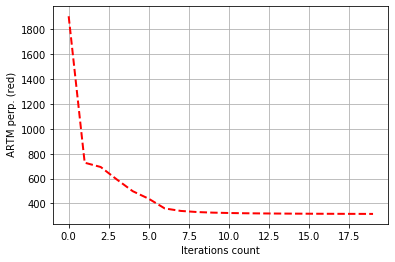

In [43]:
n_topics = 200
model_1 = init_model(n_topics, 0.25, 0.15)
model_1.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes=5)
model_1.regularizers.add(artm.SmoothSparsePhiRegularizer(name='SparsePhi', tau=-0.15, 
                                                            topic_names=[f'topic_{i}' for i in range(1, n_topics)],
                                                            ))
model_1.regularizers.add(artm.SmoothSparseThetaRegularizer(name='SparseTheta', tau=-0.15, 
                                                              topic_names=[f'topic_{i}' for i in range(1, n_topics)]))
phi_tau = model_1.regularizers['SparsePhi'].tau
theta_tau = model_1.regularizers['SparseTheta'].tau

for i in range(15):
    model_1.regularizers['SparsePhi'].tau = (phi_tau + (phi_tau*0.35))
    model_1.regularizers['SparseTheta'].tau = (theta_tau + (theta_tau*0.2))
    
    model_1.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes=1)

print_measures(model_1)

In [44]:
view_topics(model_1, 20)

topic_0:
учёный
бактерия
днк
сердце
заболевание
исследование
рак
человек
организм
клетка
---------
topic_1:
ноутбук
планшет
монета
стекло
клавиатура
экран
дюймовый
девайс
процессор
аккумулятор
---------
topic_2:
человек
лицо
фотография
оценка
результат
информация
гражданин
рейтинг
нейросеть
преступник
---------
topic_3:
участник
конкурс
победитель
мероприятие
участие
участвовать
голосование
приз
портал
организатор
---------
topic_4:
процессор
регистр
инструкция
память
архитектура
байт
битный
ассемблер
компилятор
использоваться
---------
topic_5:
регистратор
модель
видео
аппарат
китайский
запись
случай
видеорегистратор
устройство
качество
---------
topic_6:
сертификат
подпись
ключ
открытый_ключ
закрытый_ключ
документ
контроллер
функция
использоваться
публичный_ключ
---------
topic_7:
сервер
восстановление
кластер
диск
мониторинг
кэш
метрика
база
резервный_копирование
нагрузка
---------
topic_8:
доклад
конференция
разработчик
рассказать
спикер
тема
выступление
мероприятие
проект
встреча


Sparsity Phi: 0.797 ARTM)
Sparsity Theta: 0.537 (ARTM)
Kernel contrast: 0.264 (ARTM)
Kernel purity: 0.481 (ARTM)
Perplexity: 420.389 (ARTM)


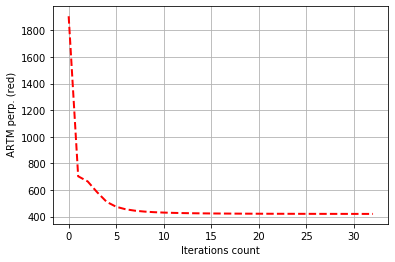

In [45]:
n_topics = 50
model_2 = init_model(n_topics, 0.1, 0.05)
model_2.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes=3)
model_2.regularizers.add(artm.SmoothSparsePhiRegularizer(name='SparsePhi', tau=-0.15, 
                                                            topic_names=[f'topic_{i}' for i in range(1, n_topics)],
                                                            ))
model_2.regularizers.add(artm.SmoothSparseThetaRegularizer(name='SparseTheta', tau=-0.15, 
                                                              topic_names=[f'topic_{i}' for i in range(1, n_topics)]))
phi_tau = model_2.regularizers['SparsePhi'].tau
theta_tau = model_2.regularizers['SparseTheta'].tau

for i in range(30):
    model_2.regularizers['SparsePhi'].tau = (phi_tau + (phi_tau*0.25))
    model_2.regularizers['SparseTheta'].tau = (theta_tau + (theta_tau*0.1))
    
    model_2.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes=1)

print_measures(model_2)